# Backpropag_res 2 xor

In [12]:
"""

Linked Education

Backpropagation XOR  saída linear (identidade)
hidden layer: 2 perceptrons com
ativação sigmoid

Código complementa planilha ANN-backprop.xlsm

Código adaptado de :
https://brilliant.org/wiki/backpropagation/

Atividade 1 : analisar código

Atividade 2: comparar resultados com a planilha ANN-backprop.xlsm

Atividade 3 : criar função custo (erro médio quadrático)
e traçar gáfico : iterações x custo

Atividade 4: inicializar com pesos randômicos (semente fixa)
e verificar número de iterações até a convergência


@author: Linked
"""

import numpy as np
import matplotlib.pyplot as plt

In [13]:


#função custo

def cost(ye,y):
    dif=ye-y
    return 0.5*np.inner(dif,dif)
# sigmoid 
def sigmoid(x, derivative=False):

    if (derivative == True):
        return x * (1 - x)
    else:
        return 1 / (1 + np.exp(-x))


np.random.seed(1)

# learning rate
alpha = .2 

# nós na camada hidden
num_hidden = 2

# inputs
X = np.array([  
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
  
])


y = np.array([[0, 1, 1, 0]]).T

# No código original, a inicialização dos pesos
# é randômica. No curso, forçamos os pesos
# iniciais da planilha..use o código comentado ou o fixo (igual à planilha)

hidden_weights=np.array([[2*np.random.random()-1, 2*np.random.random()-1],
[2*np.random.random()-1, 2*np.random.random()-1],
[2*np.random.random()-1, 2*np.random.random()-1]

])

output_weights=np.array([[2*np.random.random()-1],[2*np.random.random()-1],[2*np.random.random()-1]])


'''

hidden_weights=np.array([[0.1,  0.4],
[0.6,  0.2],
[0.3, 0.8]

])


output_weights=np.array([[0.2],[0.9],[0.7]])
'''

# número de iterações : Gradient Descent
num_iterations = 20000

costs=[]





In [14]:
for i in range(num_iterations):

    # fase forward: obtem os outputs de todas as camadas
    # cria uma coluna de 1 (np.stack) no X (bias)
    input_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), X))
    hidden_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), sigmoid(np.dot(input_layer_outputs, hidden_weights))))
    output_layer_outputs = np.dot(hidden_layer_outputs, output_weights)

    costs.append(cost(output_layer_outputs.reshape((4,)),y.reshape((4,))))  
    # backward phase
    # Erro Output 
    output_error = output_layer_outputs - y
    # 
    # Bias não entra no cálculo
    hidden_error = hidden_layer_outputs[:, 1:] * (1 - hidden_layer_outputs[:, 1:]) * np.dot(output_error, output_weights.T[:, 1:])

    # Gradiente acumulado       
    hidden_pd = input_layer_outputs[:, :, np.newaxis] * hidden_error[: , np.newaxis, :]
    output_pd = hidden_layer_outputs[:, :, np.newaxis] * output_error[:, np.newaxis, :]

    # Gradiente médio (final)
    total_hidden_gradient = np.average(hidden_pd, axis=0)
    total_output_gradient = np.average(output_pd, axis=0)

    # update weights
    hidden_weights += - alpha * total_hidden_gradient
    output_weights += - alpha * total_output_gradient
    
    
    
    


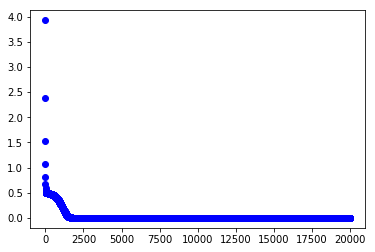

In [15]:
plt.plot(costs,'bo')
plt.show()

In [16]:
output_layer_outputs

array([[4.88498131e-15],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.52100554e-14]])